In [2]:
# Display the Folders/Classes i
# Manual garbage collection process i
import gc;
gc.collect()
import numpy as np
import pandas as pd
import os
fpath = "C:\\Users\\siddu\\Downloads\\DogbreedDetection\\images\\Images"
print(os. listdir(fpath))
dog_classes = os.listdir(fpath)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [3]:
# Get the dog Labels 
# get Labels by splitting the folder name at dash ;
breeds = [breed.split('-',1)[1] for breed in dog_classes]
# vlew some of the Labels 
breeds[:10]

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound']

In [4]:
# Get images full path and their labels
from itertools import chain
#X will have full address of each image
X =[]
#y will have its breed name
y=[]
fullpaths = ['C:\\Users\\siddu\\Downloads\\DogbreedDetection\\images\\Images\\{}'.format(dog_class) for dog_class in dog_classes]
for counter, fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath):
        X.append([fullpath + '\\' + imgname])
        y.append(breeds[counter])
print(X[:10],"\n")
print(y[:10],"\n")
X=list(chain.from_iterable(X))
print(X[:10],"\n")
len(X)

[['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10074.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10131.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10621.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_1073.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10976.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_11140.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_11238.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_11258.jpg'], ['C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_11337.jpg'], ['C:\\Users\\siddu\\Download

20580

In [5]:
# Random shuffle the images for learning |
import random 
# shuffle x and y 
combined= list(zip(X, y)) 
print(combined[:10],"\n") 
random.shuffle(combined)
print(combined[:10],"\n") 
X[:], y[:] = zip(*combined)

[('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10074.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10131.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10621.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_1073.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_10976.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_11140.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_11238.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\Untitled Folder\\images\\Images\\n02085620-Chihuahua\\n02085620_11258.jpg', 'Chihuahua'), ('C:\\Users\\siddu\\Downloads\\U

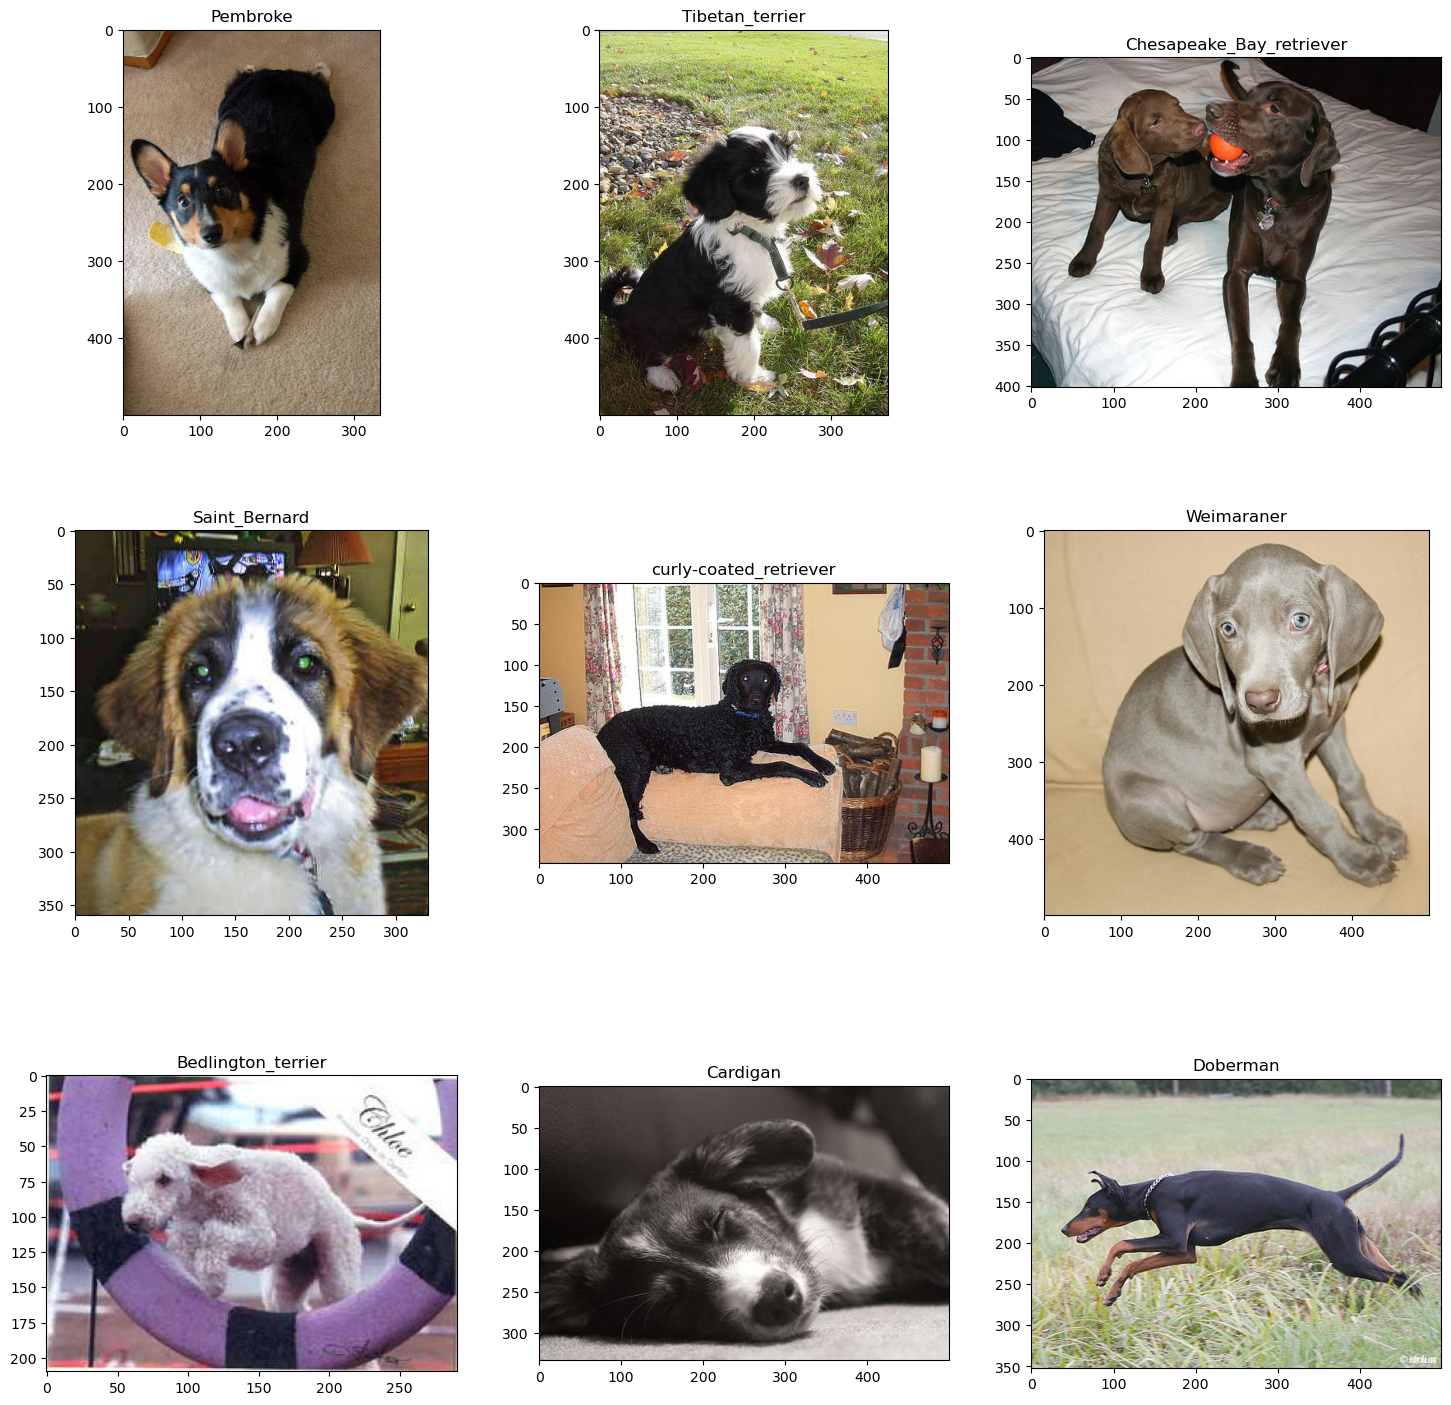

In [6]:
# Display random dogs pictures
import matplotlib.pyplot as plt
#make your plot outputs appear and be stored within the notebook
%matplotlib inline
from matplotlib.image import imread
plt.figure(figsize=(18,18))
 #Display random 9 images
#Len(X)=20580
for counter, i in enumerate(random.sample(range(0, len(X)), 9)):
    plt.subplot(3, 3, counter+1)
    plt.subplots_adjust(hspace=0.3)
    filename = X[i]
    image = imread(filename)
    plt. imshow(image)
    plt.title(y[i], fontsize=12)
plt.show()

In [7]:
# Choose a subsef to test code
X = X[:1000]
y = y[:1000]

In [8]:
# Convert labels to one-hot encoded labels
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Label and one-hot encoding y Labels
le = LabelEncoder()
le.fit(y) 
y_ohe = to_categorical(le.transform(y), len(breeds))
print(y_ohe.shape)
y_ohe = np.array(y_ohe)

Using TensorFlow backend.


(1000, 120)


In [9]:
from sklearn.model_selection import train_test_split 
#from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import img_to_array, load_img 
# load, resize images, and store as array !
img_data = np.array([img_to_array(load_img(img, target_size = (299,299))) for img in X]) 
print(img_data.shape)

#20 % of 1000 is 200 |
x_train, x_test, y_train, y_test = train_test_split(img_data, y_ohe,test_size = 0.2,random_state = 2) 
#20 % of 800 is 160 ;
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.2,random_state = 2) 
print('Training Dataset size: ', x_train.shape) 
print('Validation Dataset Size: ', x_val.shape) 
print('Testing Dataset Size: ', x_test.shape) 
print('Training Label Size: ', y_train.shape) 
print('Validation Label Size: ',y_val.shape) 
print('Testing Label Size: ', y_test.shape) 
# clear some space from memory |
import gc
del img_data
gc.collect()

(1000, 299, 299, 3)
Training Dataset size:  (640, 299, 299, 3)
Validation Dataset Size:  (160, 299, 299, 3)
Testing Dataset Size:  (200, 299, 299, 3)
Training Label Size:  (640, 120)
Validation Label Size:  (160, 120)
Testing Label Size:  (200, 120)


0

In [10]:
# Data Augnentation
from keras.applications.inception_v3 import preprocess_input 
from keras.preprocessing.image import ImageDataGenerator 
batch_size = 32 
# create train generator 
# using only preprocess_input because using pretrained models . use rescale=1./255 if training from scratch |
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rotation_range = 30,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    horizontal_flip = True) 

train_generator = train_datagen.flow(x_train, y_train, 
                                    shuffle = False, batch_size = batch_size, seed = 1) 

# Create validation generator |
val_datagen = ImageDataGenerator (preprocessing_function=preprocess_input) # do not augnent validation data |

val_generator = val_datagen.flow(x_val, y_val,
                                shuffle = False, batch_size = batch_size, seed = 1) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


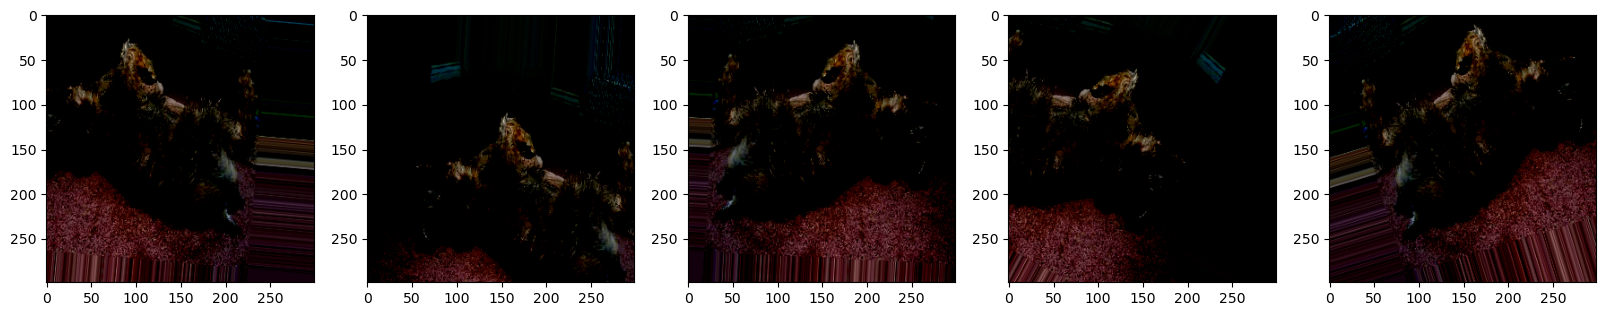

In [11]:
img_id = 2
dog_generator = train_datagen.flow(x_train[img_id : img_id+1], y_train[img_id:img_id+1],
                                    shuffle = False, batch_size = batch_size, seed = 1) 

plt.figure(figsize=(20,20))
dogs = [next(dog_generator) for i in range(0,5)]
for counter, dog in enumerate(dogs):
    plt.subplot(1, 5, counter+1) 
    plt.imshow(dog[0][0])

plt.show()

In [24]:
# Build Model Using Pre-trained Model i
from keras import models 
from keras import layers 
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer

# Load Inceptionv3 pre-trained model |
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (299,299,3)) 
model = models.Sequential () 
model.add(base_model) # add pre_trained Layers !
model.add(GlobalAveragePooling2D()) 
model.add(Dropout (0.3))
model.add(Dense(512, activation = 'relu')) 
model.add(Dense(512, activation = 'relu'))
model.add(Dense(len(breeds), activation = 'softmax'))
# Freeze pre-trained Layers 
print('Number of trainable weights before freezing the base layer:', len(model.trainable_weights))
model.layers[0].trainable = False
print('Number of trainable weights after freezing the base layer:', len(model.trainable_weights)) 

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.engine.functional.Functional object at 0x000002817C18C0D0>

In [25]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Build Model Using Pre-trained Model i
from keras import models 
from keras import layers 
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

# Load Inceptionv3 pre-trained model |
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (299,299,3)) 
model = tensorflow.keras.Sequential () 
model.add(base_model) # add pre_trained Layers !
model.add(GlobalAveragePooling2D()) 
model.add(Dropout (0.3))
model.add(Dense(512, activation = 'relu')) 
model.add(Dense(512, activation = 'relu'))
model.add(Dense(len(breeds), activation = 'softmax'))
# Freeze pre-trained Layers 
print('Number of trainable weights before freezing the base layer:', len(model.trainable_weights))
model.layers[0].trainable = False
print('Number of trainable weights after freezing the base layer:', len(model.trainable_weights)) 

In [ ]:

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() 

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) 

In [ ]:
# Train Model
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size
epochs = 20

history = model.fit_generator(train_generator,
                                steps_per_epoch = train_steps_per_epoch,
                                validation_data = val_generator,
                                validation_steps = val_steps_per_epoch,
                                epochs = epochs, verbose = 1)

In [ ]:
# Plot Accuracy and Loss ;
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
t = f.suptitle('Transfer Learning Performance', fontsize=12) 
f.subplots_adjust(top=0.85, wspace=0.3) 

epoch_list = list(range(1,epochs+1)) 
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') 
ax1.plot(epoch_list, history.history['val_accuracy'], label='validation Accuracy') 
ax1.set_xticks(np.arange(9, epochs+1, 5))
ax1.set_ylabel('Accuracy Value') 
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best") 

ax2.plot(epoch_list, history.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history.history['val_loss'], label='validation Loss') 
ax2.set_xticks(np.arange(0, epochs+1, 5)) 
ax2.set_ylabel('Loss Value') 
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss') 
l2 = ax2.legend(loc="best")  

In [ ]:
# Evaluate Hodel on Test Data 

x_test1 = x_test / 255. # rescale to 6-1. Divide by 255 as its the max RGB value 
test_predictions = model.predict(x_test1) 

# get model predictions 
predictions = le.classes_[np.argmax(test_predictions,axis=1)] # get Labels and reverse back to get the text labels |
# get target Labels ;
target_labels = le.classes_[np.argmax(y_test,axis=1)]

# Store in dataframe
predict_df = pd.DataFrame({'Target_Labels': target_labels, 'Predictions': predictions}) 
predict_df.head(20) 

In [ ]:
correct = (target_labels == predictions) 
accuracy = correct.sum() / correct.size 
print(accuracy) 

In [ ]:
from model_evaluation_utils import get_metrics 
get_metrics(true_labels=target_labels,
            predicted_labels=predictions) 

In [ ]:
plt.figure(figsize=(30,40)) 
for counter, i in enumerate(random.sample(range(0, len(y_test)), 30)): # random 30 images |
    plt.subplot(6, 5, counter+1) 
    plt.subplots_adjust(hspace=0.6) 
    actual = str(target_labels[i]) 
    predicted = str(predictions[i]) 
    conf = str(max(test_predictions[i])) 
    plt.imshow(x_test[i]/255.0) 
    plt.axis('off') 
    plt.title('Actual: ' + actual + '\nPredict: ' + predicted + '\nConf: ' + conf, fontsize=18) 

plt.show() 

In [ ]:
from flask import Flask, flash, request, redirect, url_for, render_template
import urllib.request
import os
from werkzeug.utils import secure_filename
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import img_to_array, load_img

app=Flask(__name__)
UPLOAD_FOLDER='static/uploads'
app.secret_key="secret key"
app.config['UPLOAD_FOLDER']=UPLOAD_FOLDER
app.config['MAX_CONTENT_LENGTH']=16*1024*1024

ALLOWED_EXTENSIONS=set(['png','jpg','jpeg','gif'])

def allowed_files(filename):
    return '.' in filename and filename.rsplit('.',1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/')
def home():
    return render_template('start.html')

@app.route('/',methods=['POST'])
def upload_image():
    if 'file' not in request.files:
        flash('No file part')
        return redirect(request.url)
    file=request.files['file']
    if file.filename=='':
        flash('No image selected for uploading')
        return redirect(request.url)
    if file and allowed_files(file.filename):
        filename=secure_filename(file.filename)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'],filename))
        fullpaths=['C:\\Users\\siddu\\Downloads\\DogbreedDetection\\static\\uploads\\{}'.format(filename)]
        img_data=np.array([img_to_array(load_img(img,target_size=(299,299))) for img in fullpaths])
        x_test1=img_data/255.
        test_predictions=model.predict(x_test1)
        predictions=le.classes_[np.argmax(test_predictions,axis=1)]
        name=predictions[0].upper().replace("_"," ")
        return render_template('return.html',prediction=name,src="https://simple.wikipedia.org/wiki/"+predictions[0])

if __name__=="__main__":
    app.run(debug=True, use_reloader=False)